In [0]:
 %reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

Get the data from "Planet Understand the Amazon from space" in Kaggle and Unzip it.

In [0]:
path = 'PlanetDataset'

In [0]:
! conda install --yes --prefix {sys.prefix} -c haasad eidl7zip

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\OMEN\Anaconda3

  added / updated specs:
    - eidl7zip


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    eidl7zip-1.0.0             |                1         299 KB  haasad
    ------------------------------------------------------------
                                           Total:         299 KB

The following NEW packages will be INSTALLED:

  eidl7zip           haasad/win-64::eidl7zip-1.0.0-1




eidl7zip-1.0.0       | 299 KB    |            |   0% 
eidl7zip-1.0.0       | 299 KB    | 5          |   5% 
eidl7zip-1.0.0       | 299 KB    | #          |  11% 
eidl7zip-1.0.0       | 299 KB    | ##1        |  21% 
eidl7zip-1.0.0       | 299 KB    | ####2      |  43% 
eidl7zip-1.0.0       | 299 KB    | ########5  |  86% 
eidl7zip-1.0.0       | 299 KB    | ########## | 100% 
Preparing transact

In [0]:
!7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path}


7-Zip (A) 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18

Processing archive: PlanetDataset\train-jpg.tar.7z

Extracting  train-jpg.tar

Everything is Ok

Size:       665753600
Compressed: 629296207


MULTICLASS CLASSIFICATION:-

In [0]:
import pandas as pd
df = pd.read_csv('train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats) )

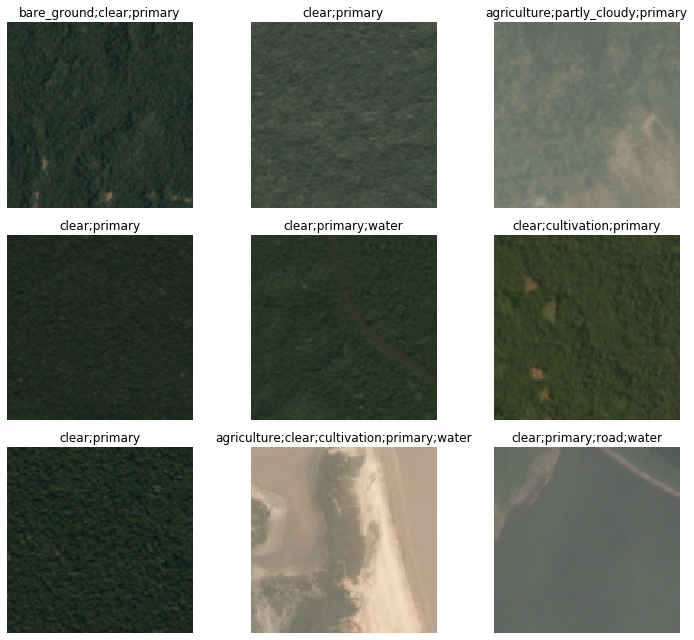

In [0]:
data.show_batch(rows=3, figsize=(10,9))

In [0]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [0]:
arch = models.resnet50

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\OMEN/.cache\torch\checkpoints\resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [01:59<00:00, 856kB/s] 


In [0]:
learn.lr_find() 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


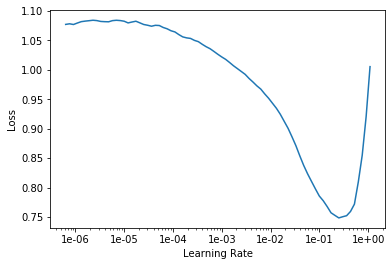

In [0]:
learn.recorder.plot()

In [0]:
lr=0.01
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.116782,0.125518,0.941409,0.886677,04:47
1,0.115372,0.109313,0.946060,0.896593,04:53
2,0.108957,0.094568,0.953573,0.919633,04:53
3,0.096281,0.086838,0.955564,0.924859,04:52
4,0.089538,0.084574,0.957802,0.927387,04:54


In [0]:
learn.save('stage-1-rn50')

Fine-tuning the whole model

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


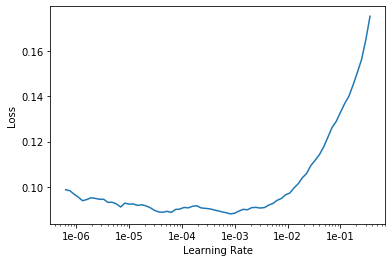

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-05,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.090241,0.084372,0.955448,0.927117,04:46
1,0.089511,0.084035,0.957345,0.927641,04:47
2,0.087316,0.083624,0.957868,0.928895,04:51
3,0.087154,0.083471,0.958398,0.929021,04:52
4,0.085083,0.083163,0.957744,0.927969,04:52


In [0]:
learn.export()